<a href="https://colab.research.google.com/github/NaviinRaghav/Task/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
df = pd.read_csv('global_traffic_accidents.csv')
print(df)

     Accident ID        Date   Time           Location   Latitude   Longitude  \
0       b0dd6f57  2023-04-19  06:39      Mumbai, India  13.488432  -73.290682   
1       debfad09  2023-01-17  02:47  São Paulo, Brazil -37.798317  -32.244242   
2       6d69aa36  2024-04-09  02:55  Sydney, Australia  33.767869  104.869018   
3       425bb1f0  2023-10-10  11:23       Tokyo, Japan  -0.378031 -165.825855   
4       90d5cf62  2023-01-02  12:07     Beijing, China  41.254879  -30.776959   
...          ...         ...    ...                ...        ...         ...   
9995    2d26c7e2  2023-01-10  18:41      Paris, France -41.344055  109.335620   
9996    4d236cfd  2023-04-04  16:48  São Paulo, Brazil -60.765148  -10.432225   
9997    1d32722f  2024-09-30  14:43     Beijing, China -11.161278  -72.164379   
9998    64722572  2024-10-27  18:34  Sydney, Australia -17.153524   20.803006   
9999    96272c1b  2024-10-26  10:30    Toronto, Canada  21.917486  100.486079   

     Weather Condition     

In [3]:
print(df.head())
print(df.info())

  Accident ID        Date   Time           Location   Latitude   Longitude  \
0    b0dd6f57  2023-04-19  06:39      Mumbai, India  13.488432  -73.290682   
1    debfad09  2023-01-17  02:47  São Paulo, Brazil -37.798317  -32.244242   
2    6d69aa36  2024-04-09  02:55  Sydney, Australia  33.767869  104.869018   
3    425bb1f0  2023-10-10  11:23       Tokyo, Japan  -0.378031 -165.825855   
4    90d5cf62  2023-01-02  12:07     Beijing, China  41.254879  -30.776959   

  Weather Condition Road Condition  Vehicles Involved  Casualties  \
0              Snow          Snowy                  5           7   
1             Clear            Icy                  4           1   
2              Rain          Snowy                  1           7   
3             Storm            Wet                  4           0   
4             Storm          Snowy                  3           9   

              Cause  
0  Reckless Driving  
1     Drunk Driving  
2  Reckless Driving  
3     Drunk Driving  
4  Rec

In [4]:
print("Dataset shape:", df.shape)
print(df.columns)

Dataset shape: (10000, 11)
Index(['Accident ID', 'Date', 'Time', 'Location', 'Latitude', 'Longitude',
       'Weather Condition', 'Road Condition', 'Vehicles Involved',
       'Casualties', 'Cause'],
      dtype='object')


In [5]:
print(df.shape)

(10000, 11)


In [6]:
features = ['Vehicles Involved', 'Casualties']
target = 'Cause' # Using 'Cause' as the target variable

# Convert 'Time' to datetime and extract hour with explicit format
if 'Time' in df.columns:

    df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour
    features.append('Hour') # Add 'Hour' to features if available

In [7]:
if 'Start_Time' in df.columns:
    df['Start_Time'] = pd.to_datetime(df['Start_Time'])
    df['Hour'] = df['Start_Time'].dt.hour
    df['Day'] = df['Start_Time'].dt.day_name()

In [8]:
if 'Time' in df.columns:
    df['Hour'] = pd.to_datetime(df['Time']).dt.hour

/tmp/ipython-input-8-4079748613.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


In [9]:
df_model = df[features + [target]].dropna()


/tmp/ipython-input-10-4103611249.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


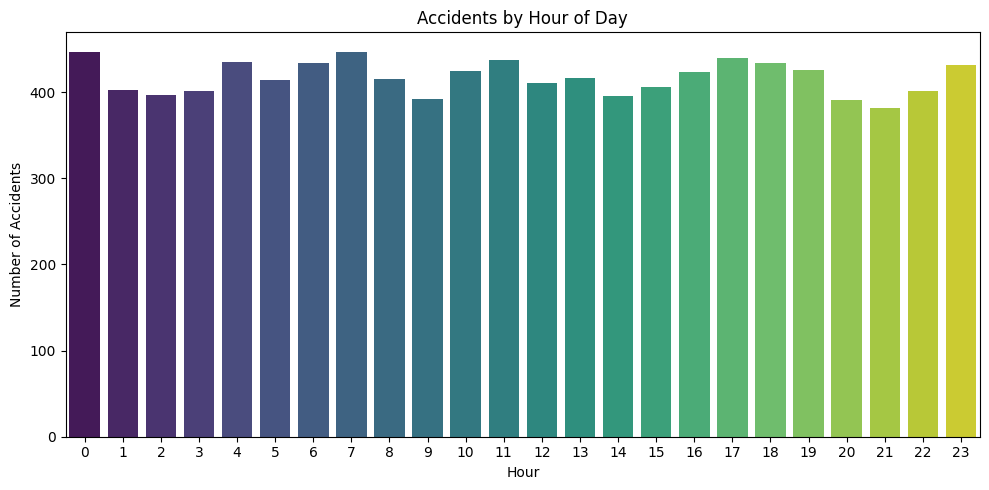

In [10]:
#Time of Day Analysis
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

In [11]:
#Weather Condition Analysis
if 'Weather_Condition' in df.columns:
    top_weather = df['Weather_Condition'].value_counts().nlargest(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_weather.values, y=top_weather.index, palette='coolwarm')
    plt.title('Top 10 Weather Conditions in Accidents')
    plt.xlabel('Number of Accidents')
    plt.tight_layout()
    plt.show()

In [12]:
X = df_model[features]
y = df_model[target]

if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [16]:
#Road Conditions
if 'Road_Condition' in df.columns:
    road_conditions = df['Road_Condition'].value_counts().nlargest(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=road_conditions.values, y=road_conditions.index, palette='magma')
    plt.title('Top Road Conditions Contributing to Accidents')
    plt.xlabel('Number of Accidents')
    plt.tight_layout()
    plt.show()

In [17]:
#Accident Hotspots (Geospatial)
if {'Start_Lat', 'Start_Lng'}.issubset(df.columns):
    sample_df = df.dropna(subset=['Start_Lat', 'Start_Lng']).sample(5000)
    fig = px.density_mapbox(sample_df, lat='Start_Lat', lon='Start_Lng',
                            z=None, radius=10,
                            center=dict(lat=37, lon=-95),
                            zoom=3,
                            mapbox_style="stamen-terrain",
                            title='Accident Hotspots in the US')
    fig.show()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
def evaluate_model(y_test, y_pred, model_name, target_names=None):
    print(f"\n--- {model_name} Evaluation ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score :", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


--- Decision Tree Evaluation ---
Accuracy : 0.1705
Precision: 0.17076284805668254
Recall   : 0.1705
F1 Score : 0.13598253437937377

Classification Report:
                     precision    recall  f1-score   support

Distracted Driving       0.18      0.43      0.26       331
     Drunk Driving       0.14      0.14      0.14       352
Mechanical Failure       0.16      0.05      0.07       334
  Reckless Driving       0.17      0.35      0.23       304
          Speeding       0.21      0.05      0.08       340
Weather Conditions       0.17      0.03      0.05       339

          accuracy                           0.17      2000
         macro avg       0.17      0.17      0.14      2000
      weighted avg       0.17      0.17      0.14      2000



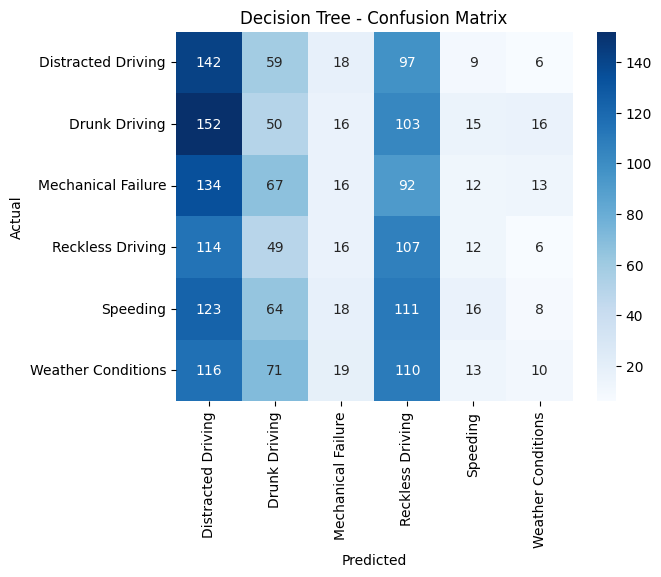


--- Random Forest Evaluation ---
Accuracy : 0.1565
Precision: 0.15772642447380772
Recall   : 0.1565
F1 Score : 0.15674588914273446

Classification Report:
                     precision    recall  f1-score   support

Distracted Driving       0.15      0.17      0.16       331
     Drunk Driving       0.19      0.18      0.18       352
Mechanical Failure       0.16      0.16      0.16       334
  Reckless Driving       0.12      0.14      0.13       304
          Speeding       0.15      0.13      0.14       340
Weather Conditions       0.18      0.17      0.17       339

          accuracy                           0.16      2000
         macro avg       0.16      0.16      0.16      2000
      weighted avg       0.16      0.16      0.16      2000



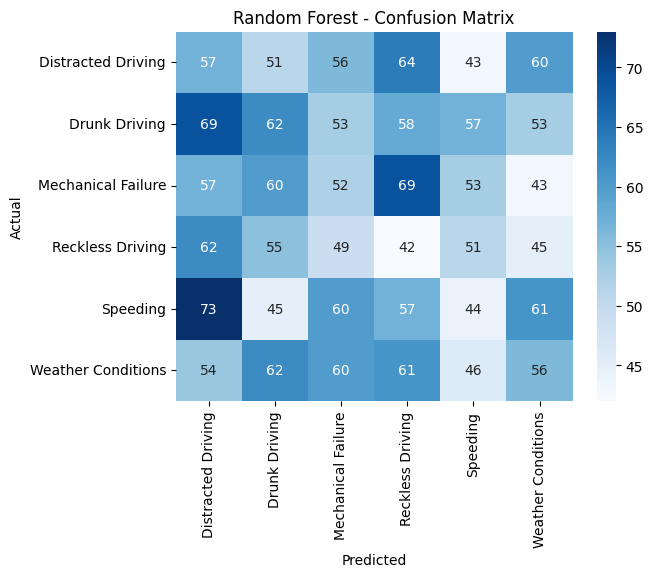

In [22]:
# Evaluate both models
target_names = le.classes_ if 'le' in locals() else None
evaluate_model(y_test, y_pred_dt, "Decision Tree", target_names)
evaluate_model(y_test, y_pred_rf, "Random Forest", target_names)

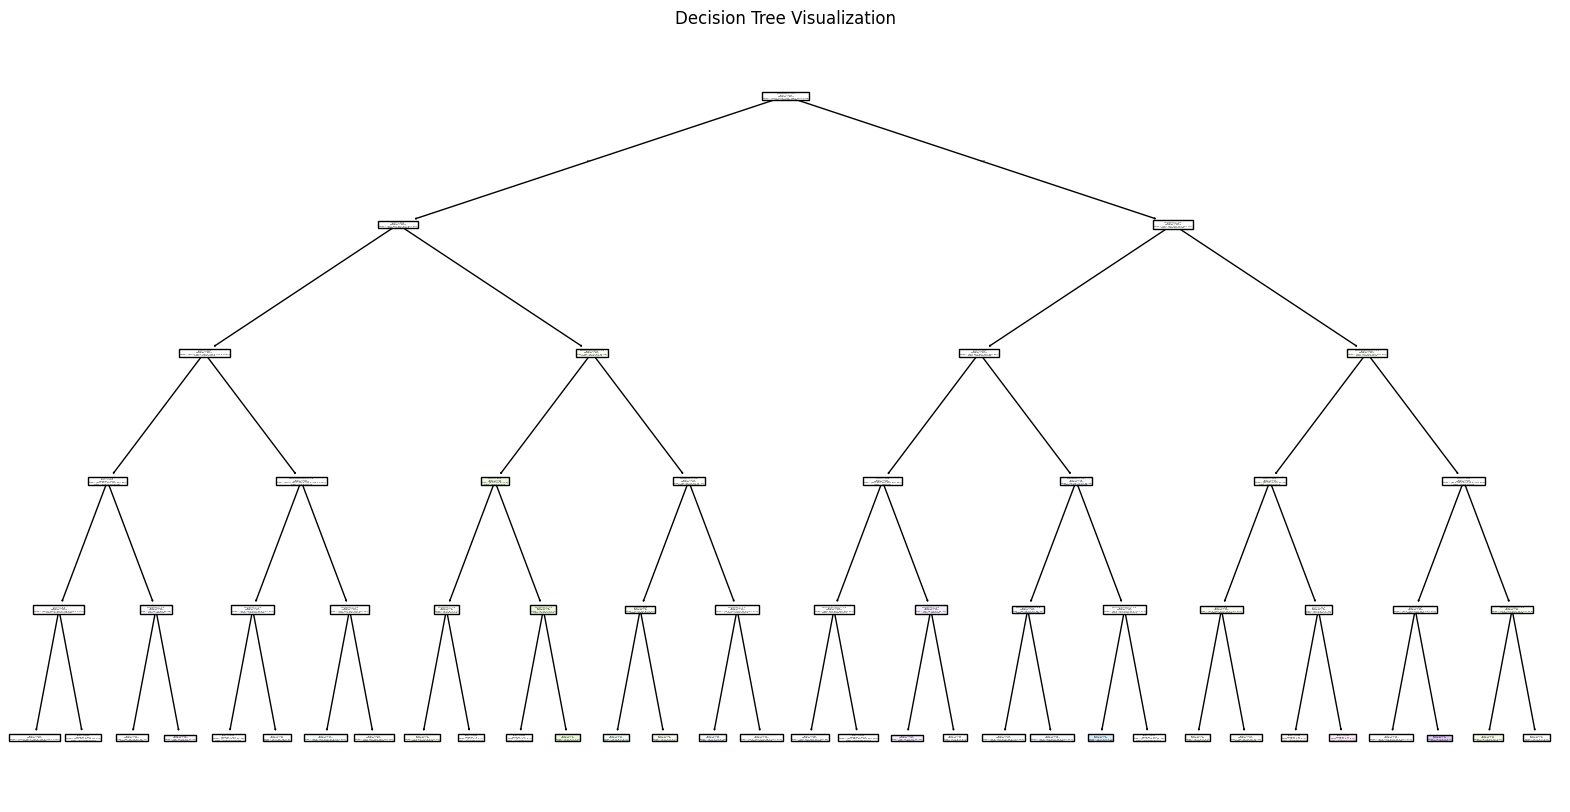

In [23]:
if dt_model.tree_.max_depth <= 10: # Example limit
    plt.figure(figsize=(20, 10))
    plot_tree(dt_model, feature_names=features, class_names=target_names, filled=True)
    plt.title("Decision Tree Visualization")
    plt.show()
else:
    print("Decision Tree is too deep to visualize effectively.")


In [24]:

importances = pd.Series(rf_model.feature_importances_, index=features)
importances = importances.sort_values(ascending=False)


/tmp/ipython-input-25-2642986274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


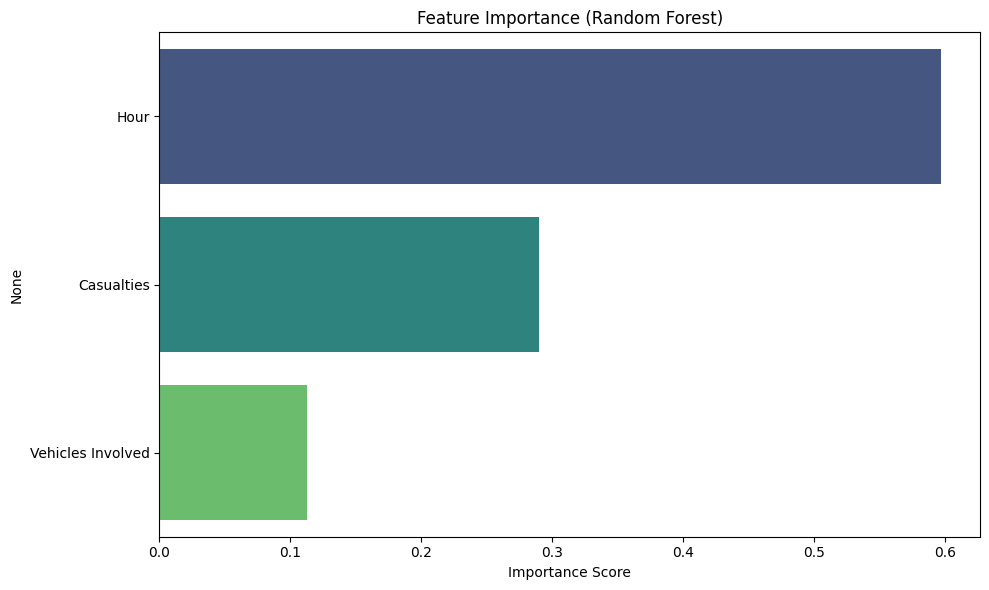

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()